In [1]:
redwine_d = 'winequality-red.csv' # https://archive.ics.uci.edu/ml/datasets/Wine+Quality
whitewine_d = 'winequality-white.csv'

import pandas as pd
import numpy as np

winequality = pd.read_csv(redwine_d, sep=';', decimal='.', header=0, names=['fixedacidity', 'volatileacidity', 'citricacid'
                                                                                  , 'residualsugar', 'chlorides', 'freesulfurdioxide'
                                                                                  , 'totalsulfurdioxide', 'density', 'ph', 'sulphates'
                                                                                  , 'alcohol', 'quality'])
# checking existence of missing values.
print winequality.isnull().values.any()

False


In [2]:
# checking out of bounds

print winequality['fixedacidity'][(15.9<winequality['fixedacidity'])|(winequality['fixedacidity']<4.6)]
print winequality['volatileacidity'][(1.6<winequality['volatileacidity'])|(winequality['volatileacidity']<0.1)]
print winequality['citricacid'][(1.0<winequality['citricacid'])|(winequality['citricacid']<0.0)]
print winequality['residualsugar'][(15.5<winequality['residualsugar'])|(winequality['residualsugar']<0.9)]
print winequality['chlorides'][(0.611<winequality['chlorides'])|(winequality['chlorides']<0.01)]
print winequality['freesulfurdioxide'][(72<winequality['freesulfurdioxide'])|(winequality['freesulfurdioxide']<1)]
print winequality['totalsulfurdioxide'][(289 < winequality['totalsulfurdioxide']) | (winequality['totalsulfurdioxide'] < 6)]
print winequality['density'][( 1.004 < winequality['density']) | (winequality['density'] <  0.990)]
print winequality['ph'][(4.0 < winequality['ph']) | (winequality['ph'] <  2.7)]
print winequality['sulphates'][(2.0 < winequality['sulphates']) | (winequality['sulphates'] <   0.3)]
print winequality['alcohol'][(14.9 < winequality['alcohol']) | (winequality['alcohol'] <   8.4)]

Series([], Name: fixedacidity, dtype: float64)
Series([], Name: volatileacidity, dtype: float64)
Series([], Name: citricacid, dtype: float64)
Series([], Name: residualsugar, dtype: float64)
Series([], Name: chlorides, dtype: float64)
Series([], Name: freesulfurdioxide, dtype: float64)
Series([], Name: totalsulfurdioxide, dtype: float64)
Series([], Name: density, dtype: float64)
1316    4.01
1321    4.01
Name: ph, dtype: float64
Series([], Name: sulphates, dtype: float64)
Series([], Name: alcohol, dtype: float64)


In [3]:
import matplotlib.pyplot as plt

# Exploring the distribution of our data...

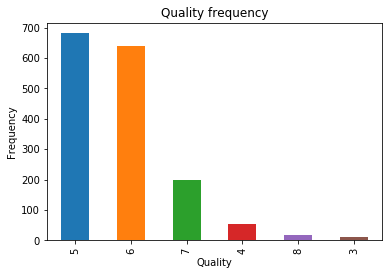

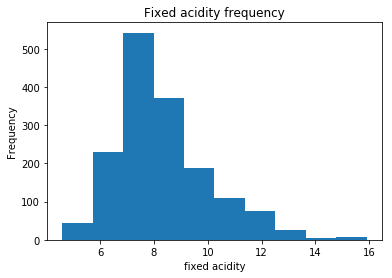

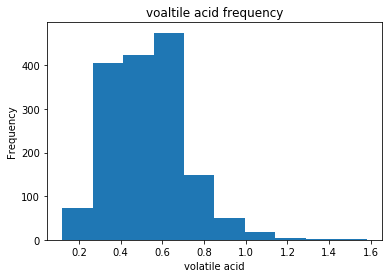

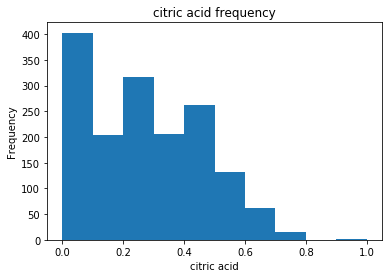

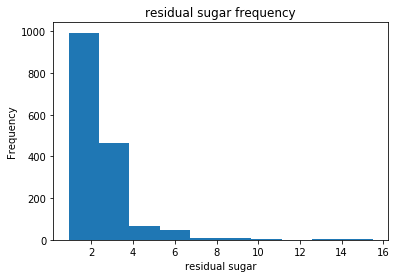

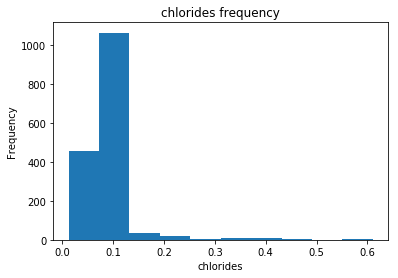

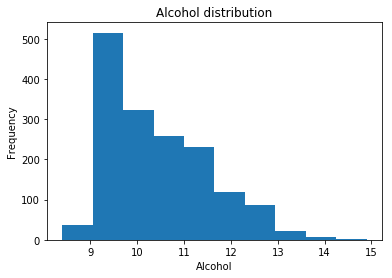

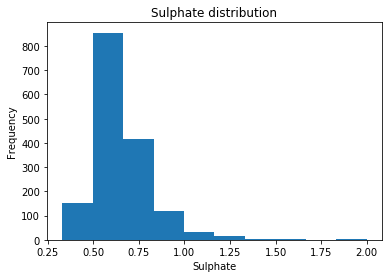

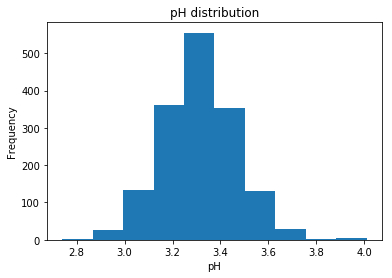

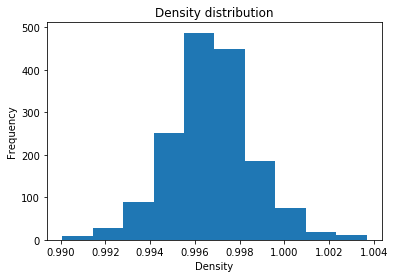

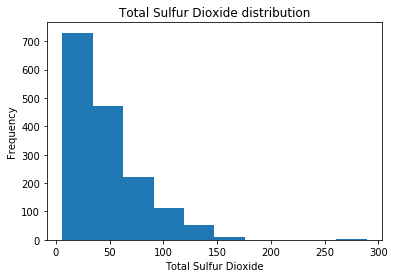

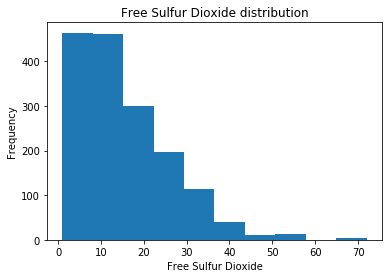

In [4]:
winequality.quality.value_counts().plot.bar()
plt.title('Quality frequency')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

winequality['fixedacidity'].plot(kind='hist')
plt.title('Fixed acidity frequency')
plt.xlabel('fixed acidity')
plt.show()

winequality['volatileacidity'].plot(kind='hist')
plt.title('voaltile acid frequency')
plt.xlabel('volatile acid')
plt.show()

winequality['citricacid'].plot(kind='hist')
plt.title('citric acid frequency')
plt.xlabel('citric acid')
plt.show()

winequality['residualsugar'].plot(kind='hist')
plt.title('residual sugar frequency')
plt.xlabel('residual sugar')
plt.show()

winequality['chlorides'].plot(kind='hist')
plt.title('chlorides frequency')
plt.xlabel('chlorides')
plt.show()

winequality['alcohol'].plot(kind='hist')
plt.title('Alcohol distribution')
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.show()

winequality['sulphates'].plot(kind='hist')
plt.title('Sulphate distribution')
plt.xlabel('Sulphate')
plt.show()

winequality['ph'].plot(kind='hist')
plt.title('pH distribution')
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.show()

winequality['density'].plot(kind='hist')
plt.title('Density distribution')
plt.xlabel('Density')
plt.show()

winequality['totalsulfurdioxide'].plot(kind='hist')
plt.title('Total Sulfur Dioxide distribution')
plt.xlabel('Total Sulfur Dioxide')
plt.show()

winequality['freesulfurdioxide'].plot(kind='hist')
plt.title('Free Sulfur Dioxide distribution')
plt.xlabel('Free Sulfur Dioxide')
plt.show()

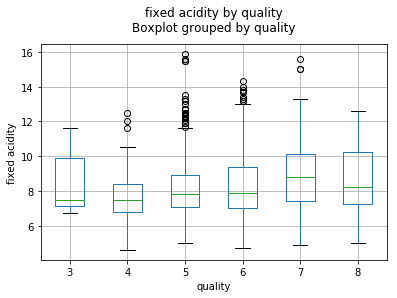

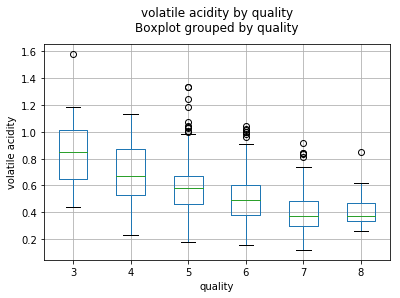

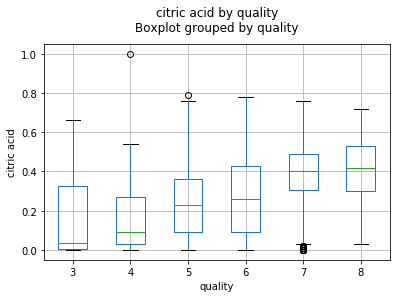

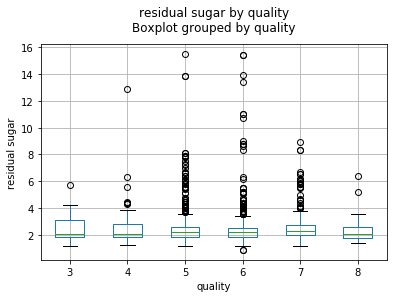

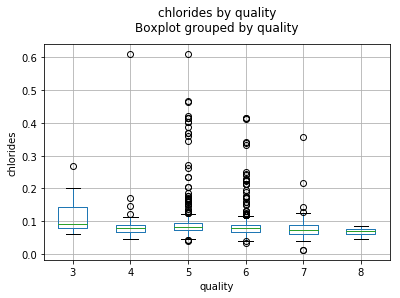

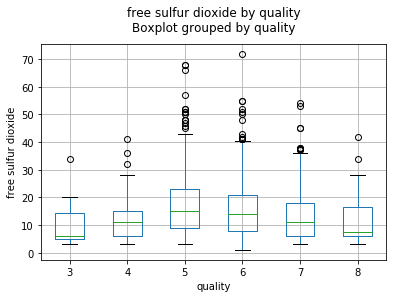

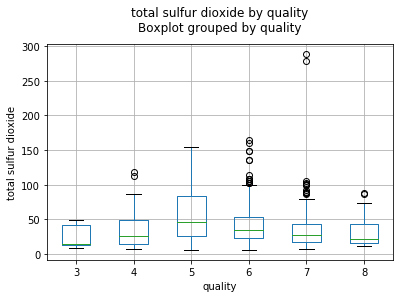

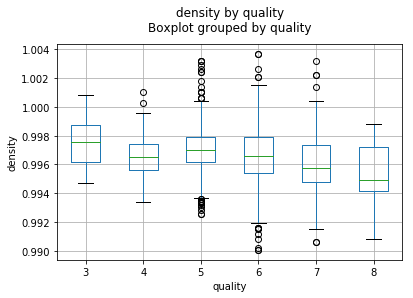

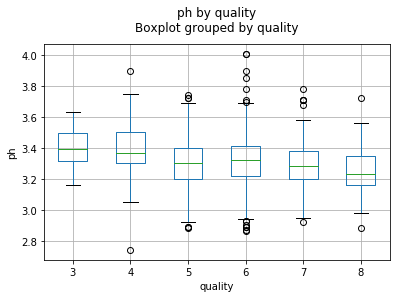

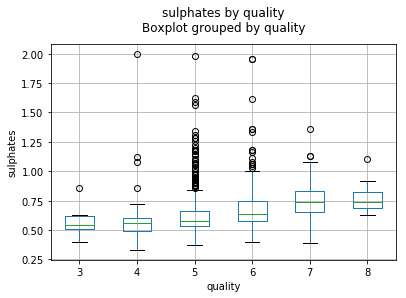

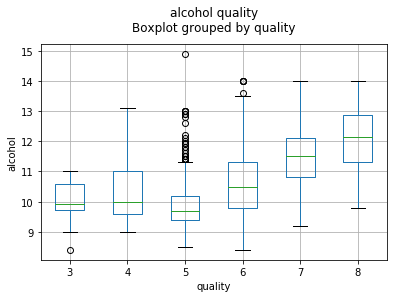

In [5]:
# Exploring relationships between our each feature and the quality....
winequality.boxplot(column='fixedacidity', by='quality')
plt.title("fixed acidity by quality", y=1.1)
plt.xlabel("quality")
plt.ylabel("fixed acidity")

winequality.boxplot(column='volatileacidity', by='quality')
plt.title("volatile acidity by quality", y =1.1)
plt.xlabel("quality")
plt.ylabel("volatile acidity")

winequality.boxplot(column='citricacid', by='quality')
plt.title("citric acid by quality", y =1.1)
plt.xlabel("quality")
plt.ylabel("citric acid")

winequality.boxplot(column='residualsugar', by='quality')
plt.title("residual sugar by quality", y =1.1)
plt.xlabel("quality")
plt.ylabel("residual sugar")

winequality.boxplot(column='chlorides', by='quality')
plt.title("chlorides by quality", y =1.1)
plt.xlabel("quality")
plt.ylabel("chlorides")

winequality.boxplot(column='freesulfurdioxide', by='quality')
plt.title("free sulfur dioxide by quality", y =1.1)
plt.xlabel("quality")
plt.ylabel("free sulfur dioxide")

winequality.boxplot(column='totalsulfurdioxide', by='quality')
plt.title("total sulfur dioxide by quality", y =1.1)
plt.xlabel("quality")
plt.ylabel('total sulfur dioxide')

winequality.boxplot(column='density', by='quality')
plt.title("density by quality", y =1.1)
plt.xlabel('quality')
plt.ylabel('density')

winequality.boxplot(column='ph', by='quality')
plt.title("ph by quality", y =1.1)
plt.xlabel('quality')
plt.ylabel('ph')

winequality.boxplot(column='sulphates', by='quality')
plt.title("sulphates by quality", y =1.1)
plt.xlabel('quality')
plt.ylabel('sulphates')

winequality.boxplot(column='alcohol', by='quality')
plt.title("alcohol quality", y =1.1)
plt.xlabel('quality')
plt.ylabel('alcohol')

plt.show()

# Observations from boxplots shows that the following features clearly affects
# quality: volatile acidity, citric acid, sulphates and alcohol.

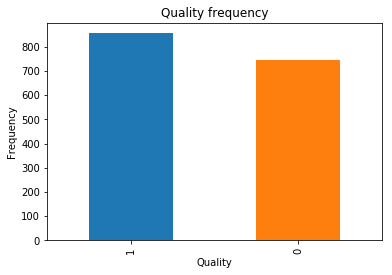

In [6]:
# simplify target into two.
winequality['quality'].replace([1,2,3,4,5], 0, inplace=True)
winequality['quality'].replace([7,6,8,9,10], 1, inplace=True)
winequality.quality.value_counts().plot.bar()
plt.title('Quality frequency')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

X = winequality.iloc[:, :-1]
y = winequality.iloc[:, 11]

In [7]:
# modelling
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# tuning k-value
cur_Best = 0
k_value = 0
for k in range(1,101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
    clf = KNeighborsClassifier(k)
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    if cur_Score > cur_Best:
        cur_Best = cur_Score
        k_value = k
print str(k_value) + " Number of neighbors: " + str(cur_Best)

36 Number of neighbors: 0.6734375


In [8]:
cur_Best = 0
k_value = 0
# tuning p value with uniform weight
for k in range(1,101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
    clf = KNeighborsClassifier(36, 'uniform', p=k)
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    if cur_Score > cur_Best:
        cur_Best = cur_Score
        k_value = k
print str(k_value) + " P value: " + str(cur_Best)

1 P value: 0.6828125


In [9]:
cur_Best = 0
k_value = 0
# tuning p value with distance weight
for k in range(1,101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
    clf = KNeighborsClassifier(36, 'distance', p=k)
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    if cur_Score > cur_Best:
        cur_Best = cur_Score
        k_value = k
print str(k_value) + " P value: " + str(cur_Best)

1 P value: 0.740625


In [10]:
# hill climbing
from sklearn.utils import shuffle
winequality_array = winequality.values
new_Ind = []
cur_MaxScore = 0.0
col_num = 11
col_Ind_Random = shuffle(range(0, col_num), random_state = 1)
for cur_f in range(col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = winequality_array[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData, y, test_size=0.2, random_state=1)
    clf = KNeighborsClassifier(36, 'distance', p=1)
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print "Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score)


Score with 1 selected features: 0.609375
Score with 2 selected features: 0.65
Score with 3 selected features: 0.671875
Score with 4 selected features: 0.71875
Score with 5 selected features: 0.728125
Score with 6 selected features: 0.759375
Score with 7 selected features: 0.759375
Score with 8 selected features: 0.80625
Score with 9 selected features: 0.8125


In [11]:
print new_Ind

[2, 3, 4, 9, 1, 6, 7, 10, 8]


In [12]:
# Dropping columns not included by hill climbing according to Hill Climbing.
new_data = winequality.drop(['freesulfurdioxide', 'fixedacidity'], axis=1)
X = new_data.iloc[:, :-1]
y = new_data.iloc[:, 9]

In [13]:
# test size 50%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

clf = KNeighborsClassifier(36, 'distance', p=1)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)

cm = confusion_matrix(y_test, y_pre)
print cm
print classification_report(y_test, y_pre)

[[253 122]
 [ 99 326]]
              precision    recall  f1-score   support

           0       0.72      0.67      0.70       375
           1       0.73      0.77      0.75       425

   micro avg       0.72      0.72      0.72       800
   macro avg       0.72      0.72      0.72       800
weighted avg       0.72      0.72      0.72       800



In [14]:
# test size 40%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

clf = KNeighborsClassifier(36, 'distance', p=1)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)

cm = confusion_matrix(y_test, y_pre)
print cm

print classification_report(y_test, y_pre)

[[220  78]
 [ 76 266]]
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       298
           1       0.77      0.78      0.78       342

   micro avg       0.76      0.76      0.76       640
   macro avg       0.76      0.76      0.76       640
weighted avg       0.76      0.76      0.76       640



In [15]:
# test size 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf = KNeighborsClassifier(36, 'distance', p=1)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)

cm = confusion_matrix(y_test, y_pre)
print cm

print classification_report(y_test, y_pre)

[[127  27]
 [ 33 133]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       154
           1       0.83      0.80      0.82       166

   micro avg       0.81      0.81      0.81       320
   macro avg       0.81      0.81      0.81       320
weighted avg       0.81      0.81      0.81       320



In [16]:
new_data = winequality.drop(['freesulfurdioxide', 'fixedacidity', 'ph', 'density'], axis=1)
X = new_data.iloc[:, :-1]
y = new_data.iloc[:, 7]

In [17]:
# test size 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf = KNeighborsClassifier(36, 'distance', p=1)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)

cm = confusion_matrix(y_test, y_pre)
print cm

print classification_report(y_test, y_pre)

[[127  27]
 [ 35 131]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       154
           1       0.83      0.79      0.81       166

   micro avg       0.81      0.81      0.81       320
   macro avg       0.81      0.81      0.81       320
weighted avg       0.81      0.81      0.81       320



In [18]:
# Feature selection according to data exploration.
new_data = winequality.drop(['freesulfurdioxide', 'fixedacidity', 'density', 'totalsulfurdioxide', 'ph', 'residualsugar'
                            , 'chlorides'], axis=1)
X = new_data.iloc[:, :-1]
y = new_data.iloc[:, 4]

In [19]:
# test size 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf = KNeighborsClassifier(36, 'distance', p=1)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)

cm = confusion_matrix(y_test, y_pre)
print cm

print classification_report(y_test, y_pre)

[[122  32]
 [ 33 133]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       154
           1       0.81      0.80      0.80       166

   micro avg       0.80      0.80      0.80       320
   macro avg       0.80      0.80      0.80       320
weighted avg       0.80      0.80      0.80       320



In [20]:
# start of decision tree classifier
# spliting the dataset
X = winequality.iloc[:,:-1]
y = winequality.iloc[:,11]

In [21]:
#Checking best possible max_depth value for test size 20%
cur_best = 0
k_value = 0
from sklearn.tree import DecisionTreeClassifier
for k in range(1,50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)
    clf = DecisionTreeClassifier(max_depth=k, random_state=0)
    fit = clf.fit(X_train, y_train)
    cur_score = clf.score(X_test, y_test)
    if cur_score>cur_best:
        cur_best = cur_score
        k_value = k
        
print str(k_value) +" "+ str(cur_best)

16 0.775


In [22]:
#Checking best possible min_samples_split value for test size 20%
cur_best = 0
k_value = 0
from sklearn.tree import DecisionTreeClassifier
for k in range(2,50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)
    clf = DecisionTreeClassifier(min_samples_split=k, random_state=0)
    fit = clf.fit(X_train, y_train)
    cur_score = clf.score(X_test, y_test)
    if cur_score>cur_best:
        cur_best = cur_score
        k_value = k
        
print str(k_value) +" "+ str(cur_best)

5 0.778125


In [23]:
#Checking best possible min_samples_leaf value for test size 20%
cur_best = 0
k_value = 0
from sklearn.tree import DecisionTreeClassifier
for k in range(2,30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)
    clf = DecisionTreeClassifier(min_samples_leaf=k, random_state=0)
    fit = clf.fit(X_train, y_train)
    cur_score = clf.score(X_test, y_test)
    if cur_score>cur_best:
        cur_best = cur_score
        k_value = k
        
print str(k_value) +" "+ str(cur_best)

5 0.775


In [24]:
#Checking best possible min_samples_leaf value for test size 20%
cur_best = 0
k_value = 0
from sklearn.tree import DecisionTreeClassifier
for k in range(2,30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)
    clf = DecisionTreeClassifier(min_samples_leaf=k, random_state=0)
    fit = clf.fit(X_train, y_train)
    cur_score = clf.score(X_test, y_test)
    if cur_score>cur_best:
        cur_best = cur_score
        k_value = k
        
print str(k_value) +" "+ str(cur_best)

5 0.775


In [25]:
#Checking best possible min_samples_leaf value for test size 20%
cur_best = 0
k_value = 0
from sklearn.tree import DecisionTreeClassifier
for k in range(1,12):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)
    clf = DecisionTreeClassifier(max_features=k, random_state=0)
    fit = clf.fit(X_train, y_train)
    cur_score = clf.score(X_test, y_test)
    if cur_score>cur_best:
        cur_best = cur_score
        k_value = k
        
print str(k_value) +" "+ str(cur_best)

2 0.784375


In [26]:
#Checking best possible max_leaf_nodes value foir test size 20%
cur_best = 0
k_value = 0
from sklearn.tree import DecisionTreeClassifier
for k in range(2,50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)
    clf = DecisionTreeClassifier(max_leaf_nodes=k, random_state=0)
    fit = clf.fit(X_train, y_train)
    cur_score = clf.score(X_test, y_test)
    if cur_score>cur_best:
        cur_best = cur_score
        k_value = k
        
print str(k_value) +" "+ str(cur_best)

44 0.759375


In [27]:
#hill climbing algorithm to find the important features in the dataset
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
winequality_array = winequality.values
new_Ind = []
cur_MaxScore = 0.0
col_num = 11
col_Ind_Random = shuffle(range(0, col_num), random_state = 1)
for cur_f in range(col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = winequality_array[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData, y, test_size=0.2, random_state=1)
    if len(newData[0]) <= 2:
        nfeatures = len(newData[0])
    clf = DecisionTreeClassifier(criterion='gini', max_features = nfeatures, max_depth=16, min_samples_split=5, min_samples_leaf=5, max_leaf_nodes=44, random_state=0)
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print "Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score)

Score with 1 selected features: 0.609375
[2]
Score with 2 selected features: 0.621875
[2, 3]
Score with 3 selected features: 0.621875
[2, 3, 4]
Score with 4 selected features: 0.68125
[2, 3, 4, 9]
Score with 5 selected features: 0.684375
[2, 3, 4, 9, 6]
Score with 6 selected features: 0.696875
[2, 3, 4, 9, 6, 0]
Score with 7 selected features: 0.715625
[2, 3, 4, 9, 6, 0, 7]
Score with 8 selected features: 0.725
[2, 3, 4, 9, 6, 0, 7, 10]


In [28]:
#Using 80% for training and 20% for tests
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)
#building the decision tree classifier
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier(criterion='gini', max_depth=16, min_samples_split=5, min_samples_leaf=5, max_features=2, max_leaf_nodes=44,random_state=0)
fit = clf1.fit(X_train, y_train)
y_pre = fit.predict(X_test)


In [29]:
#Confusion metrix for 20% test set
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print cm

[[102  52]
 [ 49 117]]


In [30]:
#Classification report for 20% test set
from sklearn.metrics import classification_report
print classification_report(y_test,y_pre)

              precision    recall  f1-score   support

           0       0.68      0.66      0.67       154
           1       0.69      0.70      0.70       166

   micro avg       0.68      0.68      0.68       320
   macro avg       0.68      0.68      0.68       320
weighted avg       0.68      0.68      0.68       320



In [31]:
#Using 60% for training and 40% for tests
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=1)
#building the decision tree classifier
from sklearn.tree import DecisionTreeClassifier
clf2 = DecisionTreeClassifier(criterion='gini', max_depth=16, min_samples_split=5, min_samples_leaf=5, max_features=2, max_leaf_nodes=44,random_state=0)
fit = clf2.fit(X_train, y_train)
y_pre = fit.predict(X_test)

In [32]:
#Confusion metrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print cm

[[190 108]
 [ 95 247]]


In [33]:
#Classification report
from sklearn.metrics import classification_report
print classification_report(y_test,y_pre)

              precision    recall  f1-score   support

           0       0.67      0.64      0.65       298
           1       0.70      0.72      0.71       342

   micro avg       0.68      0.68      0.68       640
   macro avg       0.68      0.68      0.68       640
weighted avg       0.68      0.68      0.68       640



In [34]:
#Using 50% for training and 50% for tests
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)
from sklearn.tree import DecisionTreeClassifier
clf3 = DecisionTreeClassifier(criterion='gini', max_depth=16, min_samples_split=5, min_samples_leaf=5, max_features=2, max_leaf_nodes=44,random_state=0)
fit = clf3.fit(X_train, y_train)
y_pre = fit.predict(X_test)

In [35]:
#Confusion metrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print cm

[[228 147]
 [112 313]]


In [36]:
#Classification report
from sklearn.metrics import classification_report
print classification_report(y_test,y_pre)

              precision    recall  f1-score   support

           0       0.67      0.61      0.64       375
           1       0.68      0.74      0.71       425

   micro avg       0.68      0.68      0.68       800
   macro avg       0.68      0.67      0.67       800
weighted avg       0.68      0.68      0.67       800



In [37]:
#visualising the tree 
feature_names=['fixedacidity','volatileacidity','citricacid','residualsugar','chlorides','freesulfurdioxide','totalsulfurdioxide','density','pH','sulphates','alcohol']
target_names='quality'
from sklearn import tree
with open('winequality.dot', 'w') as f:
    f = tree.export_graphviz(clf1, out_file=f, feature_names=feature_names, class_names=target_names, filled=True, rounded=True, special_characters=True)


In [38]:
# [2, 3, 9, 1, 6, 0, 7, 10, 5] 4 8 hill climbing
new_data = winequality.drop(['ph','volatileacidity', 'freesulfurdioxide'], axis=1)
X = new_data.iloc[:,:-1]
y = new_data.iloc[:, 8]

In [39]:
#Using 80% for training and 20% for tests
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)
#building the decision tree classifier
from sklearn.tree import DecisionTreeClassifier
clf2 = DecisionTreeClassifier(criterion='gini', max_depth=16, min_samples_split=5, min_samples_leaf=5, max_features=2, max_leaf_nodes=44,random_state=0)
fit = clf2.fit(X_train, y_train)
y_pre = fit.predict(X_test)


In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print cm
#Classification report
from sklearn.metrics import classification_report
print classification_report(y_test,y_pre)

[[125  29]
 [ 70  96]]
              precision    recall  f1-score   support

           0       0.64      0.81      0.72       154
           1       0.77      0.58      0.66       166

   micro avg       0.69      0.69      0.69       320
   macro avg       0.70      0.70      0.69       320
weighted avg       0.71      0.69      0.69       320



In [41]:
# Testing different features to drop.

new_data = winequality.drop(['residualsugar','density','ph','chlorides', 'freesulfurdioxide'], axis=1)
X = new_data.iloc[:,:-1]
y = new_data.iloc[:, 6]

#Using 80% for training and 20% for tests
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)
#building the decision tree classifier
from sklearn.tree import DecisionTreeClassifier
clf2 = DecisionTreeClassifier(criterion='gini', max_depth=16, min_samples_split=2, min_samples_leaf=5, max_features=2, max_leaf_nodes=37, random_state=0)
fit = clf2.fit(X_train, y_train)
y_pre = fit.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print cm
#Classification report
from sklearn.metrics import classification_report
print classification_report(y_test,y_pre)

[[113  41]
 [ 34 132]]
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       154
           1       0.76      0.80      0.78       166

   micro avg       0.77      0.77      0.77       320
   macro avg       0.77      0.76      0.76       320
weighted avg       0.77      0.77      0.77       320



In [42]:
feature_names=['fixedacidity','volatileacidity','citricacid', 'totalsulfurdioxide','sulphates','alcohol']
target_names='quality'
from sklearn import tree
with open('winequality1.dot', 'w') as f:
    f = tree.export_graphviz(clf2, out_file=f, feature_names=feature_names, class_names=target_names, filled=True, rounded=True, special_characters=True)
